# ワードクラウドの作成

このノートブックでは、コーパス内の単語の頻度に基づいて、ワードクラウドを作成します。今回は2つのデータセットを利用します。本ノートブックの格納されているフォルダにあるデータフォルダの中にあります。

## 準備

### パッケージのインストール

In [1]:
!pip install -q pandas==1.1.5 nltk==3.2.5 numpy==1.19.5 matplotlib==3.2.2 pillow==7.1.2 wordcloud==1.5.0 requests==2.23.0 spacy==3.1.3

     |████████████████████████████████| 5.9 MB 6.5 MB/s 
     |████████████████████████████████| 10.1 MB 44.2 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 623 kB 54.6 MB/s 
     |████████████████████████████████| 456 kB 55.1 MB/s 


In [2]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 79 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### インポート

In [3]:
import urllib
import re
import string
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import requests
import spacy
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### データのアップロード

以下の2つのファイルをアップロードしましょう。

- Chapter4.txt
- sts_gold_tweet.csv

In [4]:
from google.colab import files

uploaded = files.upload()

Saving Chapter4.txt to Chapter4.txt
Saving sts_gold_tweet.csv to sts_gold_tweet.csv


In [5]:
!head Chapter4.txt

Organizing is what you do before you do something, 
      so that when you do it, it is not all mixed up. 
       
- A.A. Milne

4 Text Classification

Introduction

In this chapter we will look at one of the most popular tasks in NLP - text classification. It concerns with assigning one or more groups for a given piece of text, from a larger set of possible groups. It has a wide range of applications across diverse domains such as social media, e-commerce, healthcare, law, marketing, to name a few.  A common example of text classification in our daily lives is classifying emails as spam and non-spam. Even though the purpose and application of text classification may vary from domain to domain, the underlying abstract problem remains the same. This invariance of the core problem and its applications in a myriad of domains makes text classification by far the most widely used NLP task in industry and researched in academia. In this chapter, we will discuss the usefulness of text classif

In [6]:
!head sts_gold_tweet.csv

"id";"polarity";"tweet"
"1467933112";"0";"the angel is going to miss the athlete this weekend "
"2323395086";"0";"It looks as though Shaq is getting traded to Cleveland to play w/ LeBron... Too bad for Suns' fans. The Big Cactus is no more "
"1467968979";"0";"@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH "
"1990283756";"0";"drinking a McDonalds coffee and not understanding why someone would hurt me for no apparent reason. "
"1988884918";"0";"So dissapointed Taylor Swift doesnt have a Twitter "
"1467984364";"0";"Wishes I was on the Spring Fling Tour with Dawn &amp; neecee Sigh  G'knight"
"1964951623";"0";"got a sniffle, got the kids and hubby just left to work in Sydney for the weekend, boo hoo "
"1881133744";"0";"i've only been in sydney for 3 hrs but I miss my friends  especially @ktjade!!!"
"1753802024";"0";"xboxtweet not working again "


## 本書の可視化

まずは、本書の第4章のテキストをワードクラウドで可視化してみましょう。

### データの読み込み

In [7]:
with open("Chapter4.txt", encoding="utf-8") as f:
    text = f.read()

### 前処理

前処理として、以下を行います。

- 小文字化
- 句読点の除去
- ストップワードの除去
- 見出し語化

コードブロックを除去するのも面白いと思いますが、それは皆様の演習としておきましょう。

In [8]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def lemmatize(text, allowed_postags=['NOUN']):
    doc = nlp(text) 
    return [token.lemma_ for token in doc if token.pos_ in allowed_postags]

# 見出し語化
tokens = lemmatize(text, ["NOUN"])

# 小文字化
tokens = [token.lower() for token in tokens]

# 句読点の除去
table = str.maketrans("", "", string.punctuation)
tokens = [token.translate(table) for token in tokens]

# 英語のストップワードを用意し、除去
stop_words = set(stopwords.words("english"))
stop_words.add("")
tokens = [token for token in tokens if not token in stop_words]

ワードクラウドを作成するために単語の頻度を使うので、`Counter`を使って頻度を計算します。

In [9]:
wordfreq = Counter(tokens)

In [10]:
wordfreq.most_common(n=10)

[('classification', 159),
 ('text', 149),
 ('model', 113),
 ('datum', 99),
 ('classifier', 79),
 ('feature', 72),
 ('dataset', 67),
 ('chapter', 56),
 ('word', 54),
 ('step', 52)]

### ワードクラウドの作成

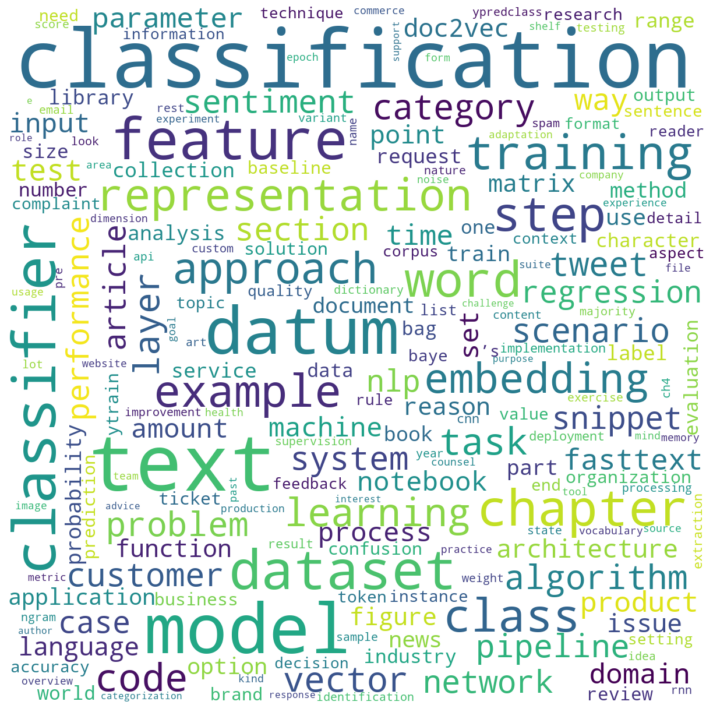

In [11]:
wordcloud = WordCloud(
    width=1200, height=1200, background_color="white", min_font_size=10
).generate_from_frequencies(wordfreq)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
def generate_wordcloud(words, mask):
    wordcloud = WordCloud(
        width=1200, height=1200, background_color="white", min_font_size=10, mask=mask
    ).generate_from_frequencies(words)
    plt.figure(figsize=(10, 8), facecolor="white", edgecolor="blue")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

ワードクラウドの形をカスタマイズしてみましょう。そのためには、画像に対するマスクを作成します。画像を扱うために、[pillow](https://pillow.readthedocs.io/en/stable/)を使うことにしましょう。

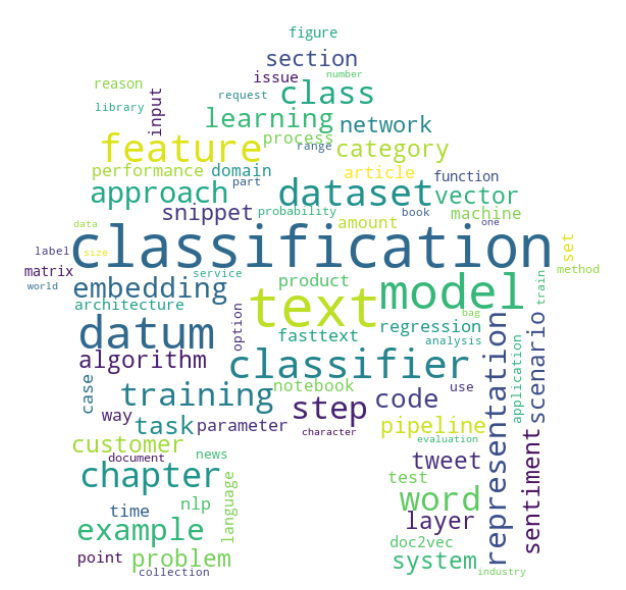

In [13]:
mask_house = np.array(
    Image.open(
        requests.get(
            "http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png", stream=True
        ).raw
    )
)
generate_wordcloud(wordfreq, mask_house)

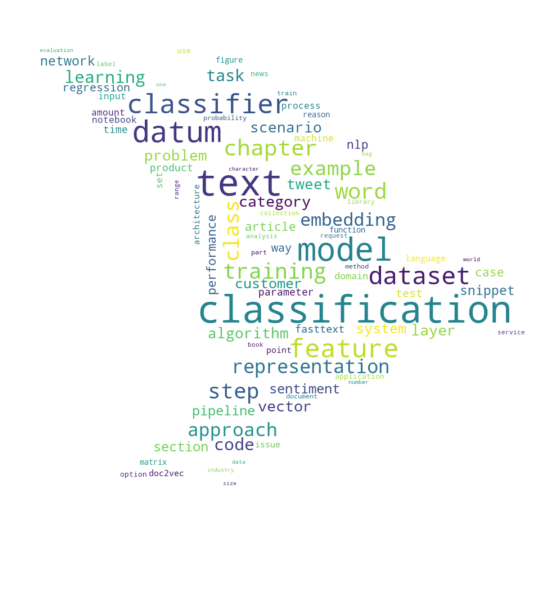

In [14]:
mask_circle = np.array(
    Image.open(
        requests.get(
            "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_960,f_auto/DCTM_Penguin_UK_DK_AL526630_wkmzns.jpg",
            stream=True,
        ).raw
    )
)
generate_wordcloud(wordfreq, mask_circle)

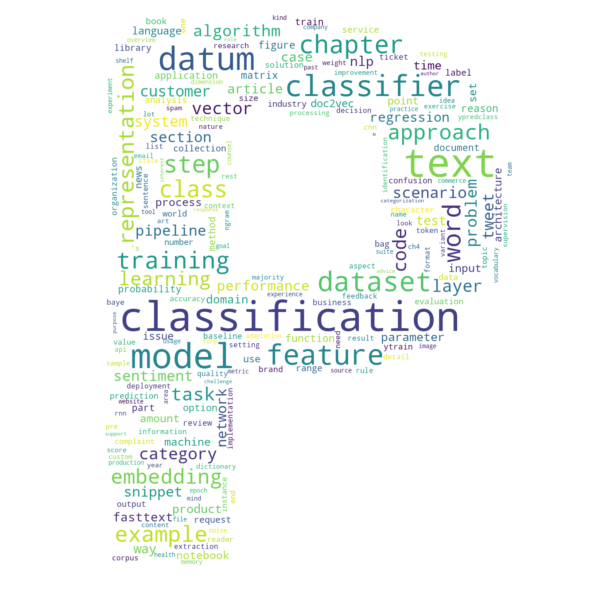

In [15]:
mask_p = np.array(
    Image.open(
        requests.get(
            "https://previews.123rf.com/images/frescomovie/frescomovie1201/frescomovie120100042/11918955-letter-p-made-from-red-blood-cells-isolated-on-a-white-.jpg",
            stream=True,
        ).raw
    )
)
generate_wordcloud(wordfreq, mask_p)

## Tweetの可視化

同様にして、Tweetについても可視化してみましょう。

### データの読み込み

In [16]:
df = pd.read_csv("sts_gold_tweet.csv", delimiter=";")

### 前処理

では、前処理をしましょう。Twitterのデータは大きすぎるので、200-300件程度まで絞り込みます。

In [17]:
df.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [18]:
df.shape

(2034, 3)

In [19]:
df_tweets = df.iloc[1750:]

In [20]:
df_tweets.shape

(284, 3)

絞り込んだら、テキストを結合します。

In [21]:
text = "".join(df_tweets["tweet"])

Tweetの場合、ハッシュタグや@メンションが含まれています。そのため、それらを除去してしまいましょう。

In [22]:
def preprocess(text):
    cleaned_tweet = text.lower()
    cleaned_tweet = re.sub(r"@\w+", "", cleaned_tweet)
    cleaned_tweet = re.sub(r"#\w+", "", cleaned_tweet)
    cleaned_tweet = re.sub(r"&amp;", "&", cleaned_tweet)
    cleaned_tweet = re.sub(r"&quot;", "", cleaned_tweet)
    cleaned_tweet = re.sub(r"(https?\://|www)\S+", "", cleaned_tweet)
    return cleaned_tweet

cleaned_tweet = preprocess(text)

In [23]:
tokens = lemmatize(cleaned_tweet, ["NOUN"])

# 小文字化
tokens = [token.lower() for token in tokens]

# 句読点の除去
table = str.maketrans("", "", string.punctuation)
tokens = [token.translate(table) for token in tokens]

# 英語のストップワードを用意し、除去
stop_words = set(stopwords.words("english"))
stop_words.add("")
tokens = [token for token in tokens if not token in stop_words]

In [24]:
wordfreq = Counter(tokens)

In [25]:
wordfreq.most_common(n=10)

[('cancer', 14),
 ('day', 13),
 ('headache', 13),
 ('iphone', 13),
 ('fever', 11),
 ('today', 11),
 ('time', 10),
 ('sydney', 9),
 ('youtube', 9),
 ('work', 9)]

### ワードクラウドの作成

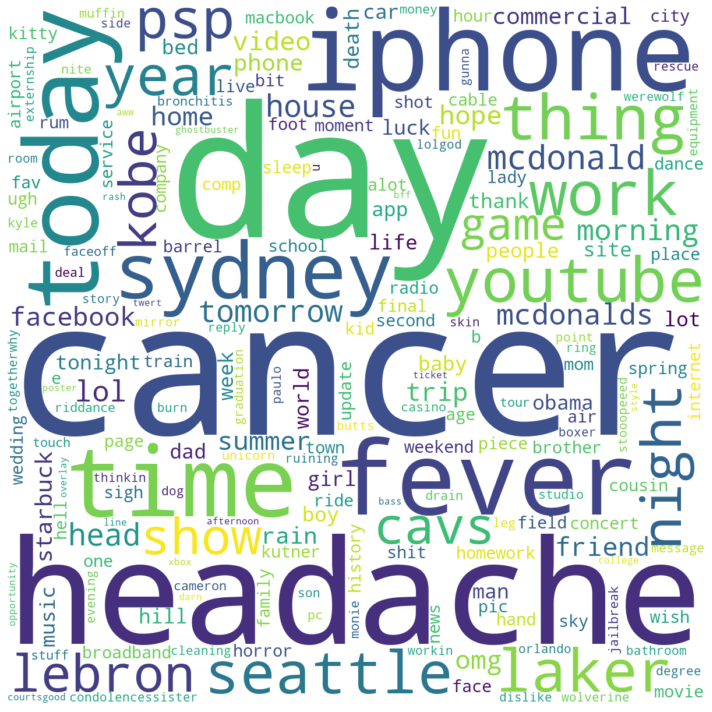

In [27]:
wordcloud = WordCloud(
    width=1200, height=1200, background_color="white", min_font_size=10
).generate_from_frequencies(wordfreq)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

## 参考資料

- [WordCloud for Python documentation](https://amueller.github.io/word_cloud/)
- [ゼロから始める自然言語処理](https://www.slideshare.net/yukiarase/fit2016-66043779)